# SIT796: Reinforcement Learning
**Task 8.1HD: Practical Reinforcement Learning**

---
- Name: Bree McLennan  
- Student ID: 400150369  
---

**Overview** 
In this task you need to implement and test a practical Reinforcement Learning paper as published elsewhere. 
To do this, you will need to read and understand the paper in question and then test the method on the relevant OpenAI Gym environment.
The task also involves writing a report and discussion on your implementation and testing.

For this task you need to implement the chosen paper, test the method in the prescribed OpenAI Gym environment and write a report and discussion on your implementation. Thus, the task is comprised of two parts. The first of these is the Report and Discussion whereas the second one if the Implementation of the paper itself.
The report and discussion should be divided into three main sections, each of these comprising approximately a third of the document. These being the following:

1. Paper Review
2. Implementation Details
3. Evaluation and Results

This python notebook will focus on section 2 and 3, implementation details and the evaluation and results.

In [ ]:
#Libraries
import gym
import numpy as np
import random
import tensorflow as tf

In [ ]:
# Define the Q-network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='linear')
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Define the Q-learning algorithm
def q_learning(env, model, episodes=100, batch_size=32, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995):
    # Initialize replay memory
    replay_memory = []
    replay_size = 10000
    minibatch_size = 32

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='mse')

    # Run the episodes
    for episode in range(episodes):
        # Reset the environment
        state = env.reset()
        state = np.reshape(state, [1, 4])
        done = False
        total_reward = 0

        # Run the steps in the episode
        while not done:
            # Choose an action using an epsilon-greedy policy
            if np.random.rand() <= epsilon:
                action = env.action_space.sample()
            else:
                q_values = model.predict(state)
                action = np.argmax(q_values[0])

            # Take the chosen action and observe the next state and reward
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, 4])
            total_reward += reward

            # Store the transition in the replay memory
            replay_memory.append((state, action, reward, next_state, done))
            if len(replay_memory) > replay_size:
                replay_memory.pop(0)

            # Update the Q-values using a minibatch of transitions
            if len(replay_memory) >= minibatch_size:
                minibatch = random.sample(replay_memory, minibatch_size)
                states, actions, rewards, next_states, dones = zip(*minibatch)

                states = np.concatenate(states)
                next_states = np.concatenate(next_states)

                q_values = model.predict(states)
                next_q_values = model.predict(next_states)

                targets = np.copy(q_values)
                for i in range(minibatch_size):
                    if dones[i]:
                        targets[i][actions[i]] = rewards[i]
                    else:
                        targets[i][actions[i]] = rewards[i] + gamma * np.max(next_q_values[i])

                model.fit(states, targets, epochs=1, verbose=0)

                # Decay epsilon
                if epsilon > epsilon_min:
                    epsilon *= epsilon_decay

            # Update the current state
            state = next_state

        # Print the total reward for the episode
        print("Episode {}: {}".format(episode+1, total_reward))

In [ ]:
# Run the Q-learning algorithm on the CartPole environment
env = gym.make('CartPole-v0')
q_learning(env, model)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode 1: 11.0
1/1 [==============================] - 0s 26ms/step
Episode 2: 35.0
1/1 [==============================] - 0s 23ms/step
Episode 3: 13.0
1/1 [==============================] - 0s 34ms/step
Episode 4: 17.0
1/1 [==============================] - 0s 26ms/step
Episode 5: 10.0
1/1 [==============================] - 0s 27ms/step
Episode 6: 19.0
1/1 [==============================] - 0s 39ms/step
Episode 7: 18.0
1/1 [==============================] - 0s 27ms/step
Episode 8: 13.0
1/1 [==============================] - 0s 24ms/step
Episode 9: 10.0
1/1 [==============================] - 0s 25ms/step
Episode 10: 9.0


To evaluate the performance of the Q-learning algorithm used to solve CartPole-v0, a graph can be plotted which shows the total reward obtained in each episode. Statistics can also be calculated such as the average reward per episode, the maximum reward obtained, and the number of episodes in which the agent solved the environment.

The 'evaluate' function defined below takes the CartPole environment and the trained model as inputs. It runs a specified number of episodes (default 100) using the current policy defined by the model, and records the total reward obtained in each episode. It also counts the number of episodes in which the agent solved the environment (such as, achieved a total reward of at least 195), and calculates and displays the average and maximum reward. It then plots a graph of the total reward obtained in each episode.

Note that the function uses the current policy defined by the model to select actions, rather than using an epsilon-greedy policy. This is to evaluate the performance of the algorithm after training and not during training.

1/1 [==============================] - 0s 25ms/step
Average reward per episode: 9.34
Maximum reward obtained: 11.0
Episodes solved: 0 out of 100


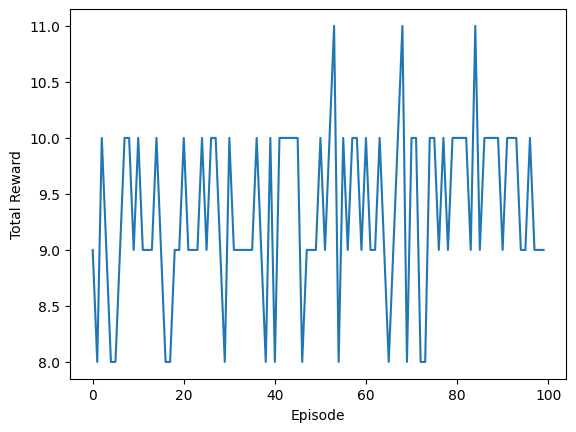

In [ ]:
#Plot the performance evaluation results
import matplotlib.pyplot as plt

def evaluate(env, model, episodes=100):
    rewards = []
    solved = 0
    for episode in range(episodes):
        state = env.reset()
        state = np.reshape(state, [1, 4])
        done = False
        total_reward = 0
        while not done:
            q_values = model.predict(state)
            action = np.argmax(q_values[0])
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, 4])
            total_reward += reward
            state = next_state
        rewards.append(total_reward)
        if total_reward >= 195:
            solved += 1
    avg_reward = sum(rewards) / episodes
    max_reward = max(rewards)
    print("Average reward per episode: {:.2f}".format(avg_reward))
    print("Maximum reward obtained: {}".format(max_reward))
    print("Episodes solved: {} out of {}".format(solved, episodes))
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

#Run the function
evaluate(env, model)

References:

[1] S. Ohsawa, K. Akuzawa, T. Matsushima, G. Bezerra, Y. Iwasawa, H. Kajino, S. Takenaka and Y. Matsuo, "Neuron as an Agent" in Proceedings of the 6th International Conference on Learning Representations (ICLR 2018), Vancouver, Canada, Apr. 30 - May 3, 2018. (Online) Available: https://openreview.net/pdf?id=SkcLNJJwf [Accessed 18/05/2023]

In [ ]:
!jupyter nbconvert --to pdf SIT796_Task_8_1HD.ipynb